Build prediction model for salary data

In [ ]:
#import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
salarydata=pd.read_csv('/content/Salary_Data.csv')
salarydata.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [4]:
salarydata.shape

(30, 2)

In [5]:
salarydata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


No NA value have found

In [7]:
salarydata.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Visualisation of data

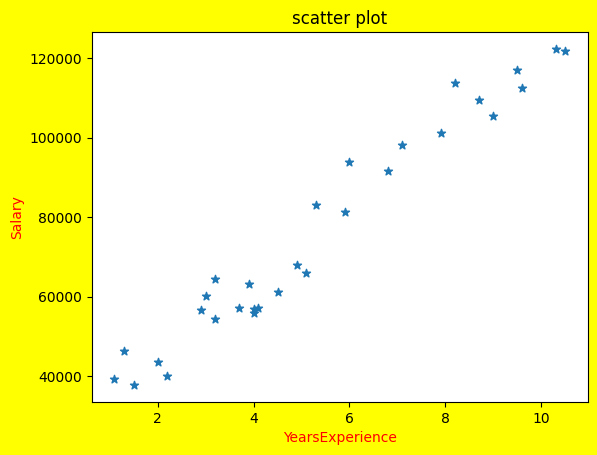

In [8]:
#finding relationship
plt.figure(facecolor='yellow')
plt.axes()
plt.scatter(salarydata['YearsExperience'],salarydata['Salary'],marker='*')
plt.title('scatter plot',color='black')
plt.xlabel('YearsExperience',color='red',size=10)
plt.ylabel('Salary',color='red',size=10)
plt.show()


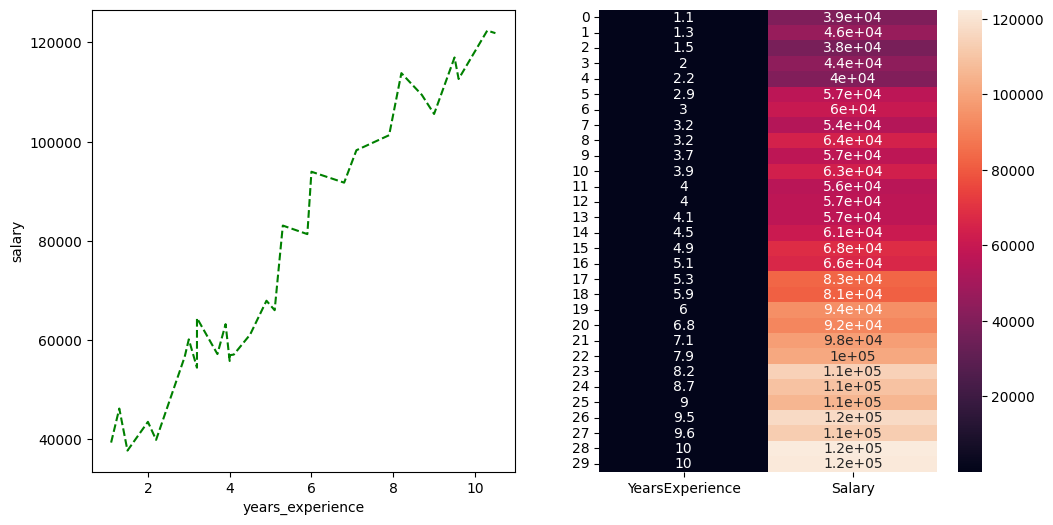

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(salarydata['YearsExperience'],salarydata['Salary'],label='salary',color='green',linestyle='dashed')
plt.xlabel('years_experience')
plt.ylabel('salary')
plt.subplot(1,2,2)
sns.heatmap(data=salarydata,annot=True)
plt.show()

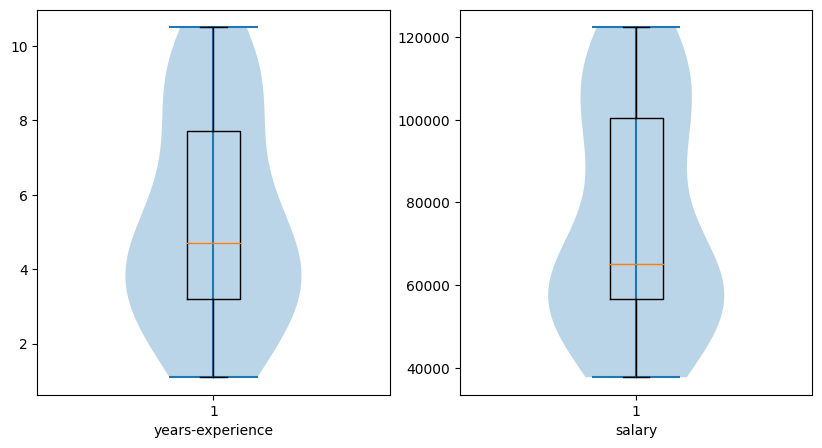

In [10]:
#checking outliers
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.violinplot(salarydata['YearsExperience'])
plt.boxplot(salarydata['YearsExperience'])
plt.xlabel('years-experience')
plt.subplot(1,2,2);
plt.violinplot(salarydata['Salary'])
plt.boxplot(salarydata['Salary'])
plt.xlabel('salary')
plt.show()

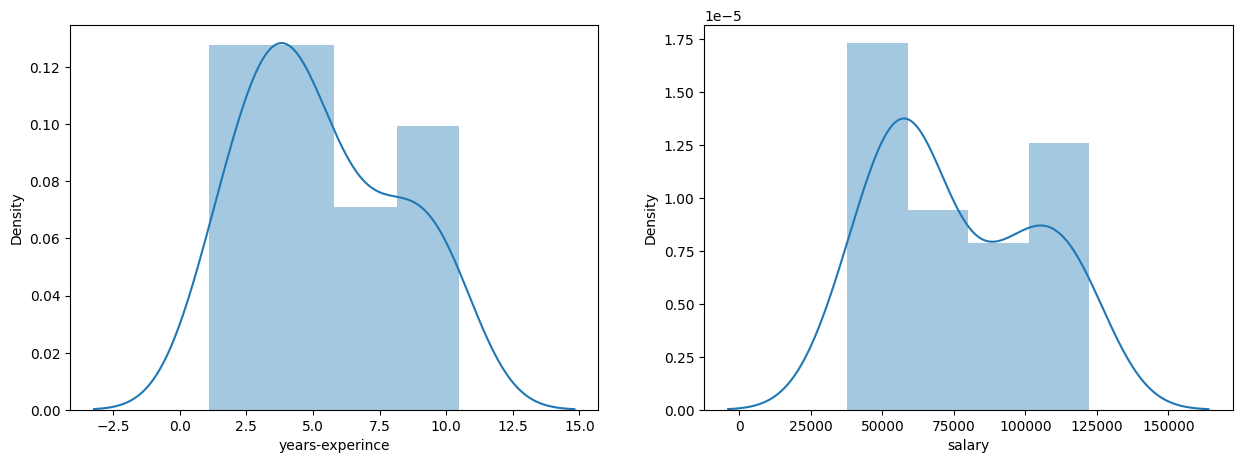

In [11]:
#checking datapoints area
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
sns.distplot(salarydata['YearsExperience'])
plt.xlabel('years-experince')
plt.subplot(1,2,2);
sns.distplot(salarydata['Salary'])
plt.xlabel('salary')
plt.show()

# Statistics & regression

In [12]:
# correlation
salarydata.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


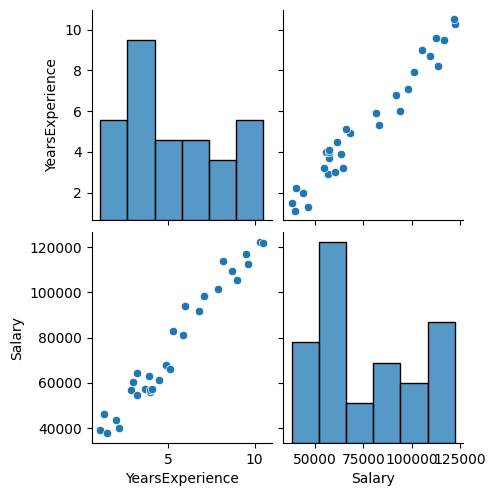

In [13]:
# Pairplot
sns.pairplot(salarydata)


In [14]:
#fitting
import statsmodels.formula.api as smf
salary_model=smf.ols('Salary~YearsExperience',data=salarydata).fit()

## Regression plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

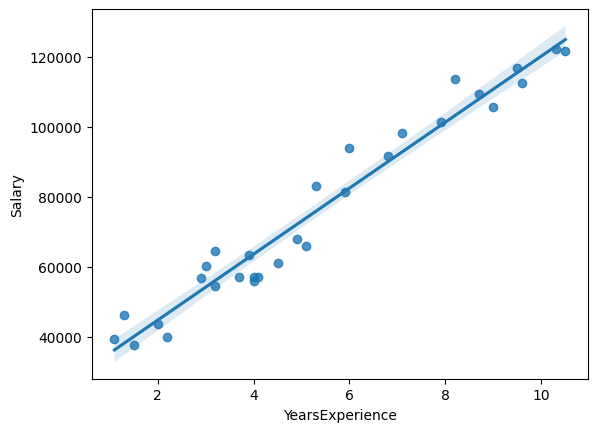

In [15]:
#regression plot
sns.regplot(x='YearsExperience',y='Salary',data=salarydata)

In [16]:
#fitted model summary
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
#coefficients
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        05:37:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square root  transformation on data

In [34]:
model1=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=salarydata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.58e-19
Time:                        05:49:22   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

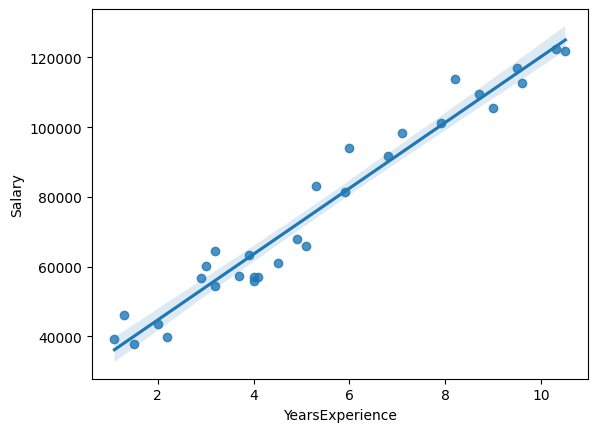

In [35]:
sqrt_model= smf.ols('Salary~YearsExperience', data=salarydata).fit()
sns.regplot(x='YearsExperience', y='Salary', data=salarydata)

## Cube root transformation on data

In [40]:
model2=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=salarydata).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.37e-18
Time:                        05:57:44   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

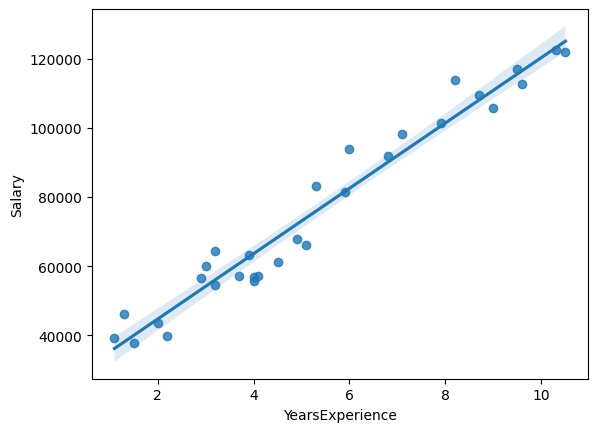

In [41]:
cube_model= smf.ols('Salary~YearsExperience', data=salarydata).fit()
sns.regplot(x='YearsExperience', y='Salary', data=salarydata)

## Log transformation on data

In [37]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = salarydata).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        05:53:08   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

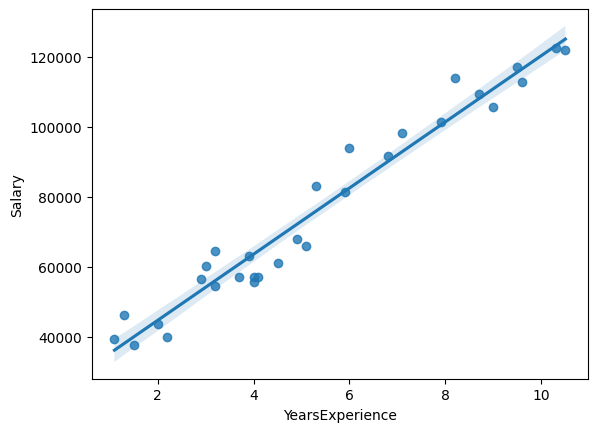

In [39]:
log_model= smf.ols('Salary~YearsExperience', data=salarydata).fit()
sns.regplot(x='YearsExperience', y='Salary', data=salarydata)

## t and p values

In [18]:
print(salary_model.tvalues,'\n',salary_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


## Model prediction

In [19]:
salary_hike=(25792.200199)+(9449.062321)*3
salary_hike

54139.387162

In [20]:
salarydata_pred=pd.DataFrame(pd.Series([5,8]),columns=['YearsExperience'])
salarydata_pred

,YearsExperience
0,5
1,8


In [21]:
salary_model.predict(salarydata_pred)

0     73042.011806
1    101391.898770
dtype: float64

# Transformation with log

In [22]:
x=salarydata['YearsExperience']
y=salarydata.Salary

salarydata['log_x']=np.log(x)
salarydata['log_y']=np.log(y)

salarydata.head()

,YearsExperience,Salary,log_x,log_y
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


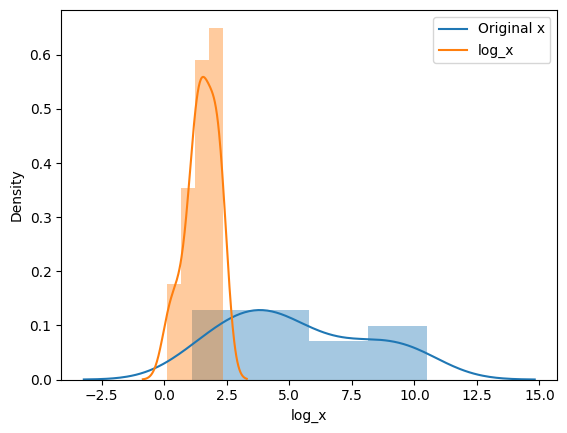

In [23]:
#Plotting
sns.distplot(x)
sns.distplot(salarydata.log_x)
labels=('Original x','log_x')
plt.legend(labels)

## #building linear regression model with log_x

In [25]:
salary_model2=smf.ols('log_y~log_x',data=salarydata).fit()

<Axes: >

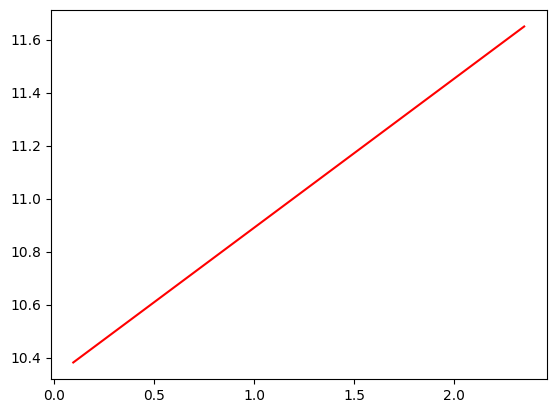

In [26]:
#plot of best fit line in the LOG Transformation case
plt.plot(salarydata.log_x,salary_model2.params[0]+salary_model2.params[1]*(salarydata.log_x),'r')
sns.scatterplot()

In [27]:
salary_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        05:39:16   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Boxcox Transformation

In [28]:
#Boxcox Transformation of x and y
x=salarydata['YearsExperience']
y=salarydata.Salary

bc_x=stats.boxcox(x)
bc_x=list(bc_x)
bc_x.pop()
bc_x=bc_x[0]
salarydata["bc_x"]=bc_x

bc_y=stats.boxcox(y)
bc_y=list(bc_y)
bc_y.pop()
bc_y=bc_y[0]
salarydata["bc_y"]=bc_y

salarydata.head()


,YearsExperience,Salary,log_x,log_y,bc_x,bc_y
0,1.1,39343.0,0.095310,10.580073,0.097408,15.936022
1,1.3,46205.0,0.262364,10.740843,0.278674,16.285303
2,1.5,37731.0,0.405465,10.538237,0.445296,15.845799
3,2.0,43525.0,0.693147,10.681091,0.814970,16.155010
4,2.2,39891.0,0.788457,10.593906,0.948515,15.965914


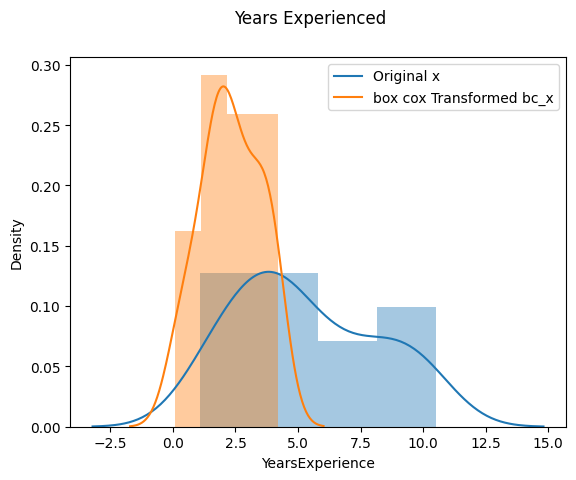

In [29]:
# boxcox Transformed Data plot
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(bc_x)
labels=("Original x","box cox Transformed bc_x")
plt.legend(labels)

In [30]:
salary_model3=smf.ols("bc_x~bc_x",data=salarydata).fit()

<Axes: >

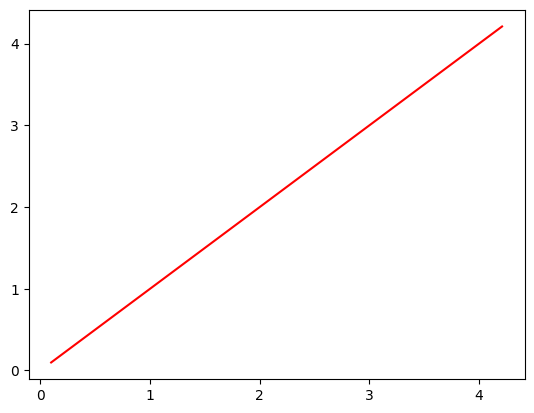

In [31]:
# fitting line in the BOXCOX Transformation plot
plt.plot(salarydata.bc_x,salary_model3.params[0]+salary_model3.params[1]*(salarydata.bc_x),"r")
sns.scatterplot()

In [32]:
salary_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bc_x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.284e+32
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:39:33   Log-Likelihood:                 1011.7
No. Observations:                  30   AIC:                            -2019.
Df Residuals:                      28   BIC:                            -2017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.882e-16    2.3e-16      3.865      0.001    4.18e-16    1.36e-15
bc_x           1.0000   8.83e-17   1.13e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.182
Skew:                           0.004   Prob(JB):                        0.554
Kurtosis:                       2.028   Cond. No.                         6.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
 #comparing above 3 models
test_data={'Model':pd.Series(['linearModel without Transformation','log Transformation','Boxcox  Transformation']),
     'R Squared':pd.Series([salary_model3.rsquared,salary_model2.rsquared,salary_model3.rsquared]),
     'adjR Squared':pd.Series([salary_model.rsquared_adj,salary_model2.rsquared_adj,salary_model3.rsquared_adj])}

test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,linearModel without Transformation,1.000000,0.955419
1,log Transformation,0.905215,0.901830
2,Boxcox Transformation,1.000000,1.000000
